# Setup

In [1]:
import ipyfan
from ipyfan.utils import norm_fn, rgba2rgb
import numpy as np
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
from ipyfan.iis_model import ritm_model as iis_model  # load interactive segmentation model
# iis_model = None  # or don't
# from ipyfan.dino_feats import get_dino_feats  # DINO features are slow and experimental

ipyfan.ritm.isegm.model.is_hrnet_model
torch.nn.modules.batchnorm


# Load your data

In [15]:
list_imgs = glob.glob('figs/*')
out_folder = 'out/'
labels_folder = 'labels/'

list_imgs = ['spatial_image'] + list_imgs
print(list_imgs)

rr = np.arange(255).reshape(1, 255) + np.zeros((255, 1))
gg = np.arange(255).reshape(255, 1) + np.zeros((1, 255))
bb = np.zeros((255, 255))
spatial_img = np.stack([rr, gg, bb], axis=2).astype(np.uint8)
# plt.imshow(img)

img_ind = 6
if img_ind == 100:
    from solarium import read_panel_image
    from pathlib import Path
    date_index = 7
    site_zip_Path = Path("/home/franchesoni/mine/creations/phd/material/data/kayrros/solarium/concho_valley.zip")
    ms_img, rgb_img = read_panel_image(site_zip_Path, date_index, normalize=True)
    curr_im = rgb_img
    feats = ms_img
elif img_ind > 1:
    curr_im = (255*norm_fn(plt.imread(list_imgs[img_ind]))).astype(np.uint8)
    feats = None
elif img_ind == 0:
    curr_im = spatial_img
    feats = spatial_img[..., :2]
    
curr_ref=None

['spatial_image', 'figs/gradient.jpg', 'figs/screen_small.png', 'figs/annotations', 'figs/chairs.png', 'figs/concho_valley', 'figs/obama.webp']


In [16]:
# feats = get_dino_feats(curr_im, 25)
# norm_fn = lambda x: (x - x.min()) / (x.max() - x.min())
# ind = 17
# plt.imshow(norm_fn(feats[..., ind*3:(ind+1)*3])); plt.axis('off')

# Config your buttons

In [17]:
validate_button = widgets.Button(
        description='Validate',
        disabled=False)

fig = plt.figure(1)
def validate(b):
    global w, fig
    fig.add_subplot(1,1,1)
    plt.imshow(w.annI[:, :, 0], interpolation='NEAREST')
    w.reset()

validate_button.on_click(validate)


<Figure size 432x288 with 0 Axes>

# Put your buttons in a box with the segmenter and run!

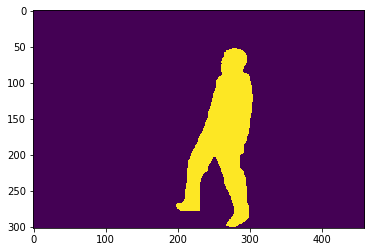

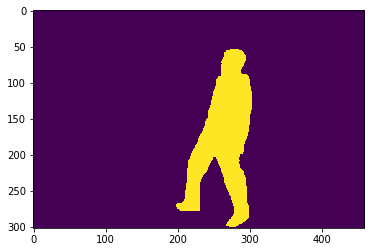

In [19]:
s = ipyfan.FullSegmenter(iis_model, curr_im, curr_ref, feats=feats, layout_size=500)
w = s.w  # this is how we access internal variables
widgets.VBox([s.get_widget(), validate_button])